# Radial Free Fall (movie)
Florent Leclercq<br/>
Institut d'Astrophysique de Paris<br/>
12 July 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
from RadialFreeFallLib import *

In [3]:
v0 = 0.99*vesc
tcrit_1 = tcrit_of_v0(v0)
tmin = 0.
tmax = 2.05*tcrit_1
step = 48*6
N = 5
ts = np.linspace(tmin,tmax,step,endpoint=False)
r_1, v_1, Ec_1, Ep_1, rcrit_1 = integrate(v0, tmin, tmax, step)
r, v, Ec, Ep, rcrit = r_1, v_1, Ec_1, Ep_1, rcrit_1

In [4]:
v0 = vesc
r_2, v_2, Ec_2, Ep_2, rcrit_2 = integrate(v0, tmin, tmax, step)
r, v, Ec, Ep, rcrit = r_2, v_2, Ec_2, Ep_2, rcrit_2

In [5]:
v0 = 1.03*vesc
r_3, v_3, Ec_3, Ep_3, rcrit_3 = integrate(v0, tmin, tmax, step)
r, v, Ec, Ep, rcrit = r_3, v_3, Ec_3, Ep_3, rcrit_3

In [6]:
class movie:
    @staticmethod
    def set_xvalues(polygon, x0, x1):
        _ndarray = polygon.get_xy()
        _ndarray[:, 0] = [x0, x0, x1, x1, x0]
        polygon.set_xy(_ndarray)

    def __init__(self):
        plt.clf()
        self.fig, ((self.ax0a, self.ax1a, self.ax2a), (self.ax0b, self.ax1b, self.ax2b), (self.ax0c, self.ax1c, self.ax2c)) =\
        plt.subplots(3,3, figsize=(10,4), height_ratios=[1, 0.1, 0.1])
        self.fig.tight_layout(pad=0., h_pad=-0.5)

    def show(self):
        self.fig.show()
    
    # Initialization function
    def init(self):
        ax0a, ax1a, ax2a, ax0b, ax1b, ax2b, ax0c, ax1c, ax2c =\
        self.ax0a, self.ax1a, self.ax2a, self.ax0b, self.ax1b, self.ax2b, self.ax0c, self.ax1c, self.ax2c
        
        for axa in {ax0a,ax1a,ax2a}:
            axa.set_xticks([])
            axa.set_yticks([])
            axa.set_xlim([0.,1.])
            axa.set_ylim([r0,1.5*r_2.max()])
            [x.set_linewidth(2.) for x in axa.spines.values()]
            axa.spines['top'].set_visible(False)
            axa.spines['right'].set_visible(False)
            axa.spines['left'].set_visible(False)
        self.scatter0a = ax0a.scatter([0.5],[r_1[0]], s=400, color="C1")
        self.scatter1a = ax1a.scatter([0.5],[r_2[0]], s=400, color="C3")
        self.scatter2a = ax2a.scatter([0.5],[r_3[0]], s=400, color="C4")
        self.hline = ax0a.plot([0.35,0.65], [rcrit_1,rcrit_1], ls="None", color="black")
    
        for ax in {ax0b,ax1b,ax2b,ax0c,ax1c,ax2c}:
            ax.set_aspect(0.1)
            ax.set_ylim([0.,1.])
            ax.set_xlim([0.,1.])
            ax.set_xticks([])
            ax.set_yticks([])
            [x.set_linewidth(2.) for x in ax.spines.values()]
        self.Ec0 = ax0b.axvspan(0., Ec_1[0]/(Ec_1[0]/N), color="C6")
        self.Ep0 = ax0c.axvspan(1.+Ep_1[0]/(Ec_1[0]/N), 1, color="C0")
        self.bar0b = ax0b.axvline([Ec_1[0]/(Ec_1[0]/N)], color="black")
        self.bar0c = ax0c.axvline([1.+Ep_1[0]/(Ec_1[0]/N)], color="black")
        self.Ec1 = ax1b.axvspan(0., Ec_2[0]/(Ec_2[0]/N), color="C6")
        self.Ep1 = ax1c.axvspan(1.+Ep_2[0]/(Ec_2[0]/N), 1., color="C0")
        self.bar1b = ax1b.axvline([Ec_2[0]/(Ec_2[0]/N)], color="black")
        self.bar1c = ax1c.axvline([1.+Ep_2[0]/(Ec_2[0]/N)], color="black")
        self.Ec2 = ax2b.axvspan(0., Ec_3[0]/(Ec_3[0]/N), color="C6")
        self.Ep2 = ax2c.axvspan(1.+Ep_3[0]/(Ec_3[0]/N), 1., color="C0")
        self.bar2b = ax2b.axvline([Ec_3[0]/(Ec_3[0]/N)], color="black")
        self.bar2c = ax2c.axvline([1.+Ep_3[0]/(Ec_3[0]/N)], color="black")
        
        return self.scatter0a, self.scatter1a, self.scatter2a, self.hline,\
        self.Ec0, self.Ep0, self.bar0b, self.bar0c, self.Ec1, self.Ep1, self.bar1b, self.bar1c, self.Ec2, self.Ep2,\
        self.bar2b, self.bar2c, 
    
    # Update function
    def update(self, i):
        ax0a, ax1a, ax2a, ax0b, ax1b, ax2b = self.ax0a, self.ax1a, self.ax2a, self.ax0b, self.ax1b, self.ax2b

        self.scatter0a.set_offsets([0.5,r_1[i]])
        self.scatter1a.set_offsets([0.5,r_2[i]])
        self.scatter2a.set_offsets([0.5,r_3[i]])
        if(ts[i]>tcrit_1):
            self.hline = ax0a.plot([0.35,0.65], [rcrit_1,rcrit_1], ls=":", color="black")
        else:
            self.hline = ax0a.plot([], [], ls="None", color="black")
        self.set_xvalues(self.Ec0, 0., Ec_1[i]/(Ec_1[0]/N))
        self.set_xvalues(self.Ep0, 1.+Ep_1[i]/(Ec_1[0]/N), 1.)
        self.bar0b.set_xdata([Ec_1[i]/(Ec_1[0]/N)])
        self.bar0c.set_xdata([1.+Ep_1[i]/(Ec_1[0]/N)])
        self.set_xvalues(self.Ec1, 0., Ec_2[i]/(Ec_2[0]/N))
        self.set_xvalues(self.Ep1, 1.+Ep_2[i]/(Ec_2[0]/N), 1.)
        self.bar1b.set_xdata([Ec_2[i]/(Ec_2[0]/N)])
        self.bar1c.set_xdata([1.+Ep_2[i]/(Ec_2[0]/N)])
        self.set_xvalues(self.Ec2, 0., Ec_3[i]/(Ec_3[0]/N))
        self.set_xvalues(self.Ep2, 1.+Ep_3[i]/(Ec_3[0]/N), 1.)
        self.bar2b.set_xdata([Ec_3[i]/(Ec_3[0]/N)])
        self.bar2c.set_xdata([1.+Ep_3[i]/(Ec_3[0]/N)])
        return self.scatter0a, self.scatter1a, self.scatter2a, self.hline,\
        self.Ec0, self.Ep0, self.bar0b, self.bar0c, self.Ec1, self.Ep1, self.bar1b, self.bar1c, self.Ec2, self.Ep2,\
        self.bar2b, self.bar2c, 
        
    # Create the animation
    def animate(self):
        animation = FuncAnimation(self.fig, self.update, frames=step, init_func=self.init, blit=True)
        return animation

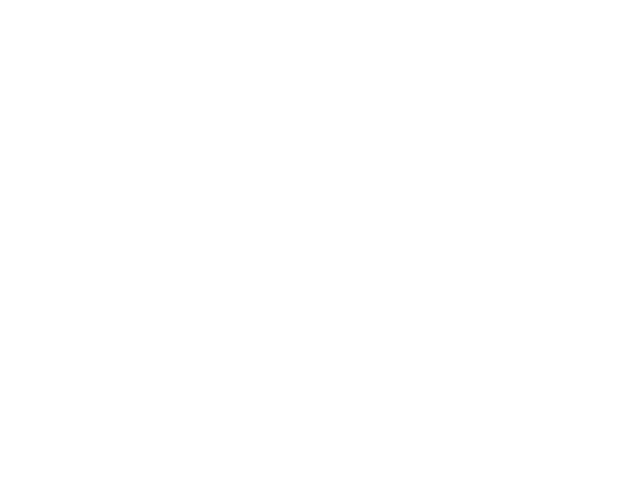

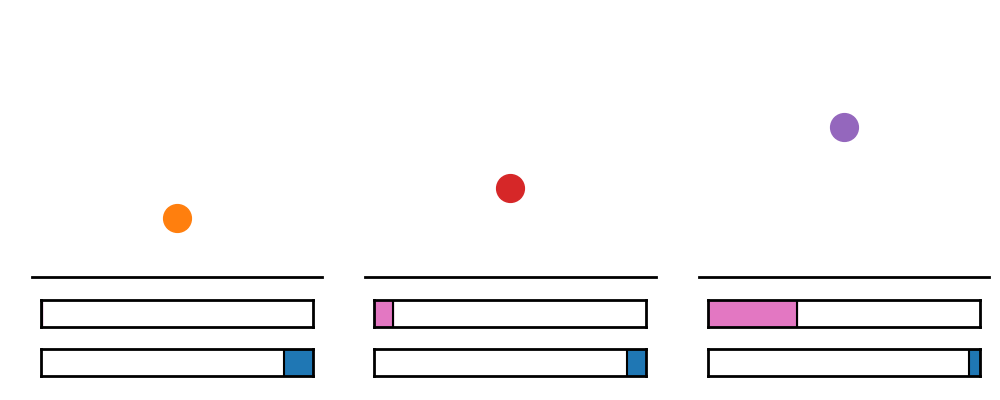

In [7]:
i=100
frame = movie()
frame.init();
frame.update(i);

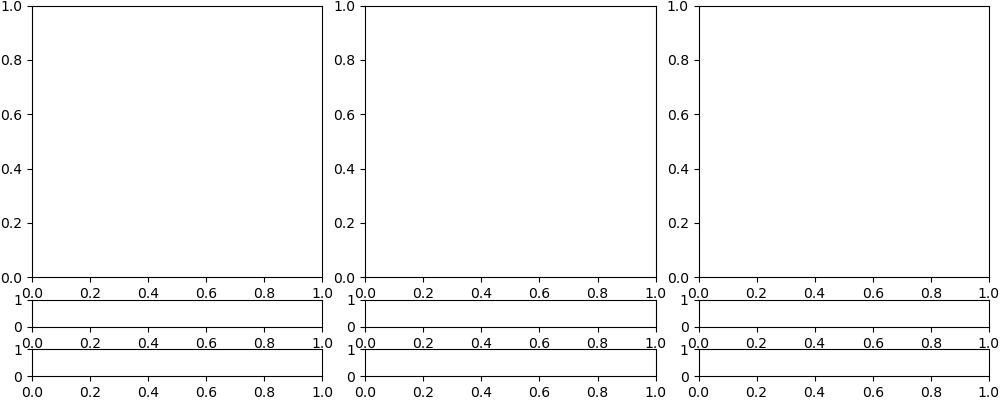

In [8]:
this_movie = movie()
animation = this_movie.animate()

In [9]:
animation.save("output/RadialFreeFall.mp4", dpi=300, fps=48)